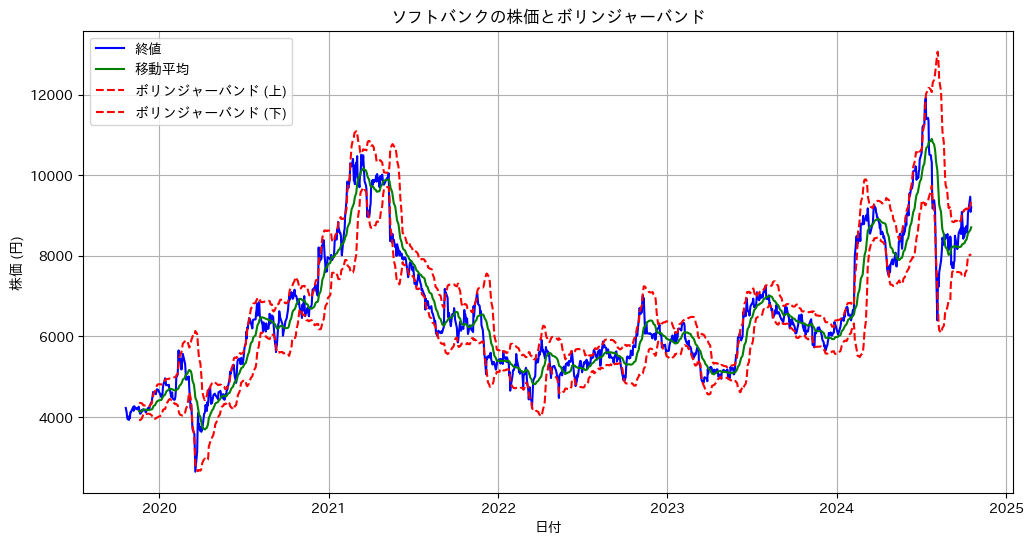

In [1]:
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの設定
import numpy as np

# ソフトバンクの株価データをStooqから取得
df = pdr.DataReader("9984.JP", "stooq").sort_index()

# ボリンジャーバンドの計算
window = 20  # 20日間の移動平均
df['移動平均'] = df['Close'].rolling(window=window).mean()
df['ボリンジャーバンド上'] = df['移動平均'] + 2 * df['Close'].rolling(window=window).std()
df['ボリンジャーバンド下'] = df['移動平均'] - 2 * df['Close'].rolling(window=window).std()

# グラフの作成
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='終値', color='blue')
plt.plot(df.index, df['移動平均'], label='移動平均', color='green')
plt.plot(df.index, df['ボリンジャーバンド上'], label='ボリンジャーバンド (上)', color='red', linestyle='--')
plt.plot(df.index, df['ボリンジャーバンド下'], label='ボリンジャーバンド (下)', color='red', linestyle='--')

# グラフの装飾
plt.title('ソフトバンクの株価とボリンジャーバンド')
plt.xlabel('日付')
plt.ylabel('株価 (円)')
plt.legend(loc='best')
plt.grid(True)

# グラフの表示
plt.show()
